In [1]:
using Pkg,Plots
Pkg.activate(".")
using Clapeyron

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1342
┌ Warning: Module PlotUtils with build ID 3352955038437901 is missing from the cache.
│ This may mean PlotUtils [995b91a9-d308-5afd-9ec6-746e21dbc043] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1030
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency PlotThemes [ccf2f8ad-2431-5c83-bf29-c5338b663b6a] failed to load from a cache file.")
└ @ Base loading.jl:1055
  Activating new environment at `C:\Users\Pierre J Walker\OneDrive - Imperial College London\Documents\OpenSAFT\examples\Project.toml`
┌ Info: Precompiling Clapeyron [7c7805af-46cc-48c9-995b-ed0ed2dc909a]
└ @ Base loading.jl:1342


In this notebook we will try to replicate various figures from J. Gross and G. Sadowski's 2001 paper

## Figure 3

In [2]:
# Setting up the models
methane      = PCSAFT(["methane"])
propylene    = PCSAFT(["propylene"])
toluene      = PCSAFT(["toluene"])
diethylether = PCSAFT(["diethyl ether"]);

In [3]:
# Get critical point for all species
(T_c_methane, p_c_methane, v_c_methane)                = crit_pure(methane)
(T_c_propylene, p_c_propylene, v_c_propylene)          = crit_pure(propylene)
(T_c_toluene, p_c_toluene, v_c_toluene)                = crit_pure(toluene)
(T_c_diethylether, p_c_diethylether, v_c_diethylether) = crit_pure(diethylether);

In [12]:
# Get saturation properties for all species
T_methane      = range(100, T_c_methane, length = 100)
T_propylene    = range(100, T_c_propylene, length = 100)
T_toluene      = range(170, T_c_toluene, length = 100)
T_diethylether = range(150, T_c_diethylether, length = 100)

A = sat_pure.(methane,T_methane)
B = sat_pure.(propylene,T_propylene)
C = sat_pure.(toluene,T_toluene)
D = sat_pure.(diethylether,T_diethylether)

methane_sat = [tup[i] for tup in A, i in 1:3]
propylene_sat = [tup[i] for tup in B, i in 1:3]
toluene_sat = [tup[i] for tup in C, i in 1:3]
diethylether_sat = [tup[i] for tup in D, i in 1:3];

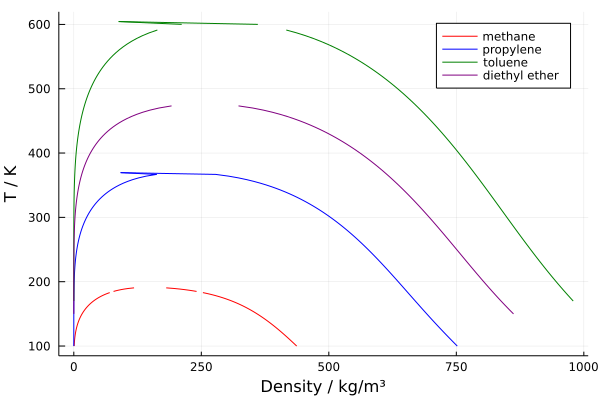

In [13]:
plt =  plot(0.016 ./methane_sat[:,2], T_methane,color=:red,xlabel="Density / kg/m³",ylabel="T / K", label = "methane")
plt = plot!(0.016 ./methane_sat[:,3], T_methane,color=:red, label = "")
plt = plot!(0.042 ./propylene_sat[:,2], T_propylene,color=:blue, label = "propylene")
plt = plot!(0.042 ./propylene_sat[:,3], T_propylene,color=:blue, label = "")
plt = plot!(0.092 ./toluene_sat[:,2], T_toluene,color=:green, label = "toluene")
plt = plot!(0.092 ./toluene_sat[:,3], T_toluene,color=:green, label = "")
plt = plot!(0.074 ./diethylether_sat[:,2], T_diethylether,color=:purple, label = "diethyl ether")
plt = plot!(0.074 ./diethylether_sat[:,3], T_diethylether,color=:purple, label = "")
display(plt)

## Figure 4

In [14]:
# Setting up the models
CO2      = PCSAFT(["carbon dioxide"]);

In [16]:
# Get critical point
(T_c_CO2, p_c_CO2, v_c_CO2) = crit_pure(CO2);

In [23]:
# Get saturation properties
T_CO2      = range(220, T_c_CO2, length = 100)

A = sat_pure.(CO2,T_CO2)

CO2_sat = [tup[i] for tup in A, i in 1:3];

In [24]:
# Get various isobars
p = 10 .^(5 .+range(0.7,3,length=200))

v_1 = volume.(CO2,p,320)
v_2 = volume.(CO2,p,400)
v_3 = volume.(CO2,p,300)
v_4 = volume.(CO2,p,250);

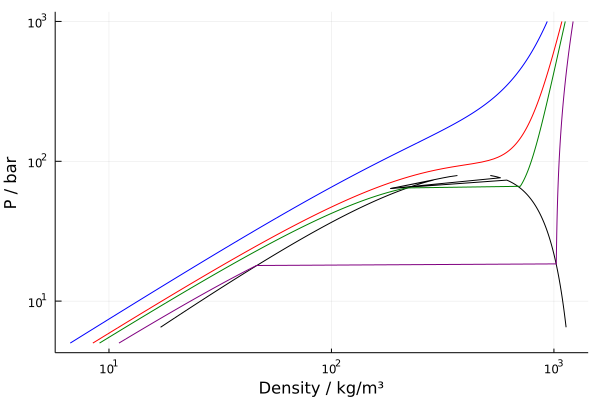

In [25]:
plt = plot(0.044 ./CO2_sat[:,2], CO2_sat[:,1]/1e5,xaxis=:log,yaxis=:log,color=:black,xlabel="Density / kg/m³",ylabel="P / bar", label = "")
plt = plot!(0.044 ./CO2_sat[:,3], CO2_sat[:,1]/1e5,color=:black, label = "")
plt = plot!(0.044 ./v_1, p/1e5,color=:red, label = "")
plt = plot!(0.044 ./v_2, p/1e5,color=:blue, label = "")
plt = plot!(0.044 ./v_3, p/1e5,color=:green, label = "")
plt = plot!(0.044 ./v_4, p/1e5,color=:purple, label = "")
display(plt)

## Figure 6

In [57]:
# Setting up the models
benzene      = system(["benzene"],"PCSAFT")
isobutane    = system(["isobutane"],"PCSAFT");

In [58]:
(T_c_benzene, p_c_benzene, v_c_benzene)       = get_crit_pure(benzene)
(T_c_isobutane, p_c_isobutane, v_c_isobutane) = get_crit_pure(isobutane);

In [59]:
# Get enthalpies of vapourisation
h_vap_benzene   = get_enthalpy_vap.(benzene,T_c_benzene*range(0.5,0.99,length=100))
h_vap_propylene = get_enthalpy_vap.(propylene,T_c_propylene*range(0.2,0.99,length=100))
h_vap_isobutane = get_enthalpy_vap.(isobutane,T_c_isobutane*range(0.3,0.99,length=100));

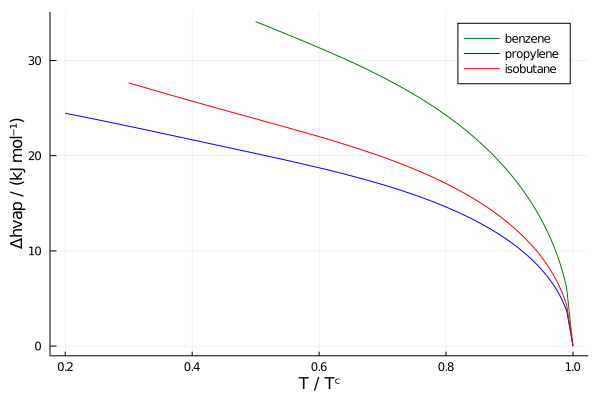

In [60]:
plt = plot(append!(collect(range(0.5,0.99,length=100)),1), append!(h_vap_benzene,0)/1e3,color=:green,xlabel="T / Tᶜ",ylabel="Δhvap / (kJ mol⁻¹)", label = "benzene")
plt = plot!(append!(collect(range(0.2,0.99,length=100)),1), append!(h_vap_propylene,0)/1e3,color=:blue,label = "propylene")
plt = plot!(append!(collect(range(0.3,0.99,length=100)),1), append!(h_vap_isobutane,0)/1e3,color=:red,label = "isobutane")
display(plt)

## Figure 7

In [61]:
# Initiate system
butane = system(["butane"],"PCSAFT")
mix = system(["methane","butane"],"PCSAFT");

In [62]:
# Obtain saturation pressure of less volatile component
T_but = [294.15,394.15]
A = get_sat_pure.(butane, T_but)
P_sat = [A[i][1] for i in 1:length(T_but)];

In [63]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,0.737,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 294.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat[1]);

In [64]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,0.36,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix, 394.15, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat[2]);

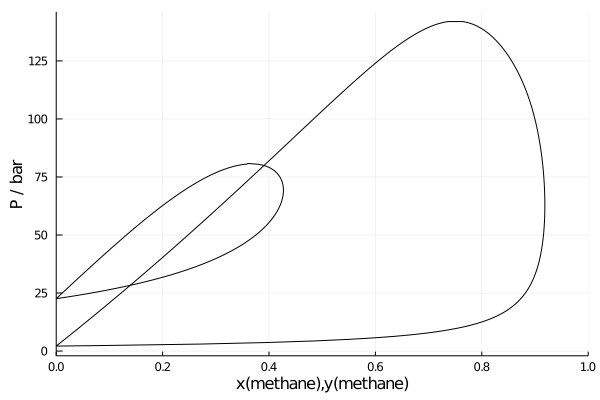

In [65]:
# Plotting
z_1 = vcat(x_1,reverse(y_1))
z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2))


plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(methane),y(methane)",ylabel="P / bar",xlim=(0,1))
plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(methane),y(methane)",ylabel="P / bar")
display(plt)

## Figure 8

In [66]:
# Initiate system
decane = system(["decane"],"PCSAFT")
mix = system(["ethane","decane"],"PCSAFT");

In [67]:
# Obtain saturation pressure of less volatile component
T_dec = [444.15,511.15]
A = get_sat_pure.(decane, T_dec)
P_sat = [A[i][1] for i in 1:length(T_dec)];

In [68]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,0.837,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 444.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat[1]);

In [69]:
# Obtain mixture saturation conditions 2

# x composition
x = range(1e-3,0.715,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix, 511.15, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat[2]);

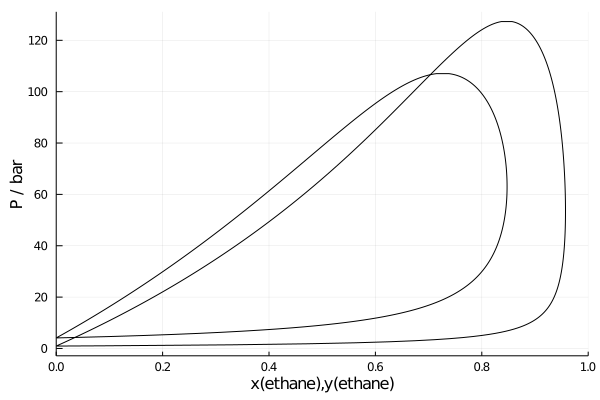

In [70]:
# Plotting
z_1 = vcat(x_1,reverse(y_1))
z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2))


plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(ethane),y(ethane)",ylabel="P / bar",xlim=(0,1))
plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(ethane),y(ethane)",ylabel="P / bar")
display(plt)

## Figure 9

In [71]:
# Initiate system
ethane = system(["ethane"],"PCSAFT")
diethylether = system(["diethyl ether"],"PCSAFT")
mix = system(["ethane","diethyl ether"],"PCSAFT");

In [72]:
# Obtain saturation pressure of less volatile component
T_eth = [150,250,298.15]
T_DEE = [298.15]
A = get_sat_pure.(ethane, T_eth)
B = get_sat_pure.(diethylether, T_DEE)
P_sat_1 = [A[i][1] for i in 1:length(T_eth)]
P_sat_2 = [B[i][1] for i in 1:length(T_DEE)];

In [73]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-4,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 298.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_1[end])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_2[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

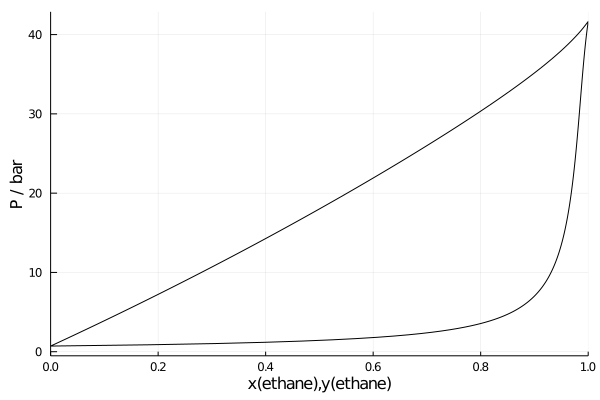

In [74]:
# Plotting
plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(ethane),y(ethane)",ylabel="P / bar",xlim=(0,1))
display(plt)

## Figure 10

In [75]:
# Initiate system
benzene = system(["benzene"],"PCSAFT")
propane = system(["propane"],"PCSAFT")
mix = system(["propane","benzene"],"PCSAFT");

In [76]:
# Obtain saturation pressure of less volatile component
T_prop = [250,344.15]
T_benz = [344.15,411.15,477.15]
A = get_sat_pure.(propane, T_prop)
B = get_sat_pure.(benzene, T_benz)
P_sat_1 = [A[i][1] for i in 1:length(T_prop)]
P_sat_2 = [B[i][1] for i in 1:length(T_benz)];

In [77]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-3,1-1e-2,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 344.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
append!(x_1,1.)
append!(y_1,1.)
append!(P_sat_mix_1,P_sat_1[2])
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat_2[1])
z_1 = vcat(x_1,reverse(y_1))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1));

In [78]:
# Obtain mixture saturation conditions 2

# x composition
x = range(1e-3,0.869,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix, 411.15, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat_2[2])
z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2));

In [79]:
# Obtain mixture saturation conditions 3

# x composition
x = range(1e-3,0.585,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_3,v_l,v_v,y) = get_bubble_pressure(mix, 477.15, x);

# Concantenate results
x_3 = x[:,1]
y_3 = y[:,1]
pushfirst!(x_3,0.)
pushfirst!(y_3,0.)
pushfirst!(P_sat_mix_3,P_sat_2[3])
z_3 = vcat(x_3,reverse(y_3))
P_sat_mix_3 = vcat(P_sat_mix_3,reverse(P_sat_mix_3));

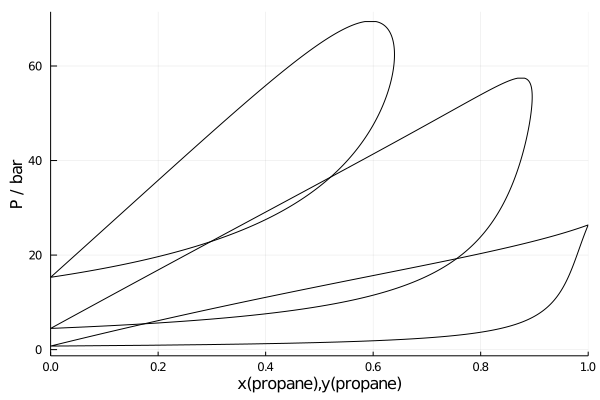

In [80]:
# Plotting
plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(propane),y(propane)",ylabel="P / bar",xlim=(0,1))
plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(propane),y(propane)",ylabel="P / bar",xlim=(0,1))
plt = plot!(z_3,P_sat_mix_3/1e5,color=:black,label="",xlabel="x(propane),y(propane)",ylabel="P / bar",xlim=(0,1))
display(plt)

## Figure 12

In [81]:
# Initiate system
decane = system(["decane"],"PCSAFT")
CO2 = system(["carbon dioxide"],"PCSAFT")
mix = system(["carbon dioxide","decane"],"PCSAFT");

In [82]:
# Obtain saturation pressure of less volatile component
T_dec = [277.15,511.15]
A = get_sat_pure.(decane, T_dec)
P_sat = [A[i][1] for i in 1:length(T_dec)];

In [83]:
# Obtain mixture saturation conditions 2

# x composition
x = range(1e-3,0.735,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_2,v_l,v_v,y) = get_bubble_pressure(mix, 511.15, x);

# Concantenate results
x_2 = x[:,1]
y_2 = y[:,1]
pushfirst!(x_2,0.)
pushfirst!(y_2,0.)
pushfirst!(P_sat_mix_2,P_sat_2[2]);

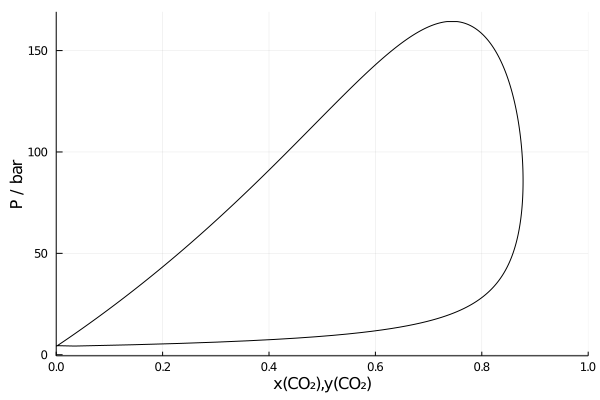

In [84]:
# Plotting
# z_1 = vcat(x_1,reverse(y_1))
z_2 = vcat(x_2,reverse(y_2))
# P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1))
P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2))


plt = plot(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(CO₂),y(CO₂)",ylabel="P / bar",xlim=(0,1))
display(plt)

## Figure 13

In [85]:
# Initiate system
cyclohexane = system(["cyclohexane"],"PCSAFT")
mix = system(["carbon dioxide","cyclohexane"],"PCSAFT");

In [86]:
# Obtain saturation pressure of less volatile component
T_cyclohex = [344.15,523.15]
A = get_sat_pure.(cyclohexane, T_cyclohex)
P_sat = [A[i][1] for i in 1:length(T_cyclohex)];

In [87]:
# Obtain mixture saturation conditions 1

# x composition
x = range(1e-2,0.875,length=200)
x = hcat(x,1 .-x)

# Solve for bubble point and corresponding vapour phase
(P_sat_mix_1,v_l,v_v,y) = get_bubble_pressure(mix, 344.15, x);

# Concantenate results
x_1 = x[:,1]
y_1 = y[:,1]
pushfirst!(x_1,0.)
pushfirst!(y_1,0.)
pushfirst!(P_sat_mix_1,P_sat[1]);

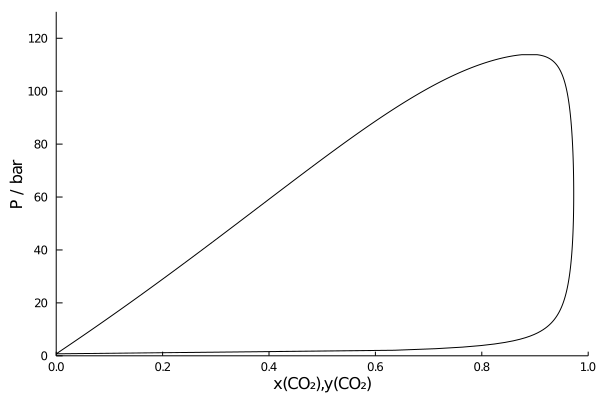

In [88]:
# Plotting
z_1 = vcat(x_1,reverse(y_1))
# z_2 = vcat(x_2,reverse(y_2))
P_sat_mix_1 = vcat(P_sat_mix_1,reverse(P_sat_mix_1))
# P_sat_mix_2 = vcat(P_sat_mix_2,reverse(P_sat_mix_2))


plt = plot(z_1,P_sat_mix_1/1e5,color=:black,label="",xlabel="x(CO₂),y(CO₂)",ylabel="P / bar",ylim=(0,130),xlim=(0,1),grid=false)
# plt = plot!(z_2,P_sat_mix_2/1e5,color=:black,label="",xlabel="x(CO₂),y(CO₂)",ylabel="P / bar")
display(plt)

## Figure 16

In [26]:
# Creating models
hexane    = PCSAFT(["hexane"])
chlorobut = PCSAFT(["1-chlorobutane"])
mix       = PCSAFT(["hexane","1-chlorobutane"]);

In [27]:
# Get pure enthalpies
h_1 = enthalpy(hexane,1.01e5,298)
h_2 = enthalpy(chlorobut,1.01e5,298);

In [28]:
# Get excess enthalpy
x = range(1e-10,1-1e-10,length=100)
h_E = []
for i in x
    append!(h_E,enthalpy(mix,1.01e5,298,[i,1-i])-i*h_1-(1-i)*h_2)
end

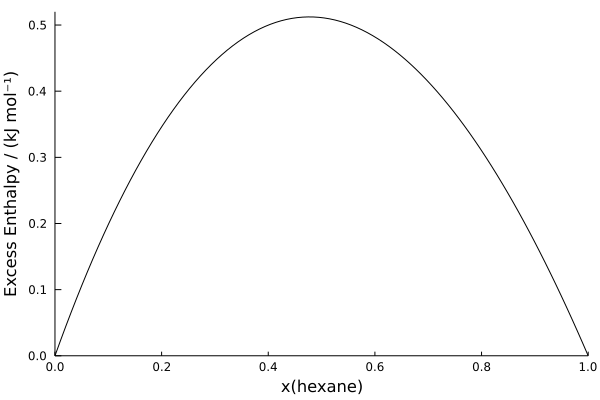

In [29]:
plt = plot(x, h_E/1e3,color=:black,xlabel="x(hexane)",ylabel="Excess Enthalpy / (kJ mol⁻¹)",label="",ylim=(0,0.52),xlim=(0,1),grid=false)
display(plt)